## Inverse Transform Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def inverse_transform_sampling(min, max, sample_size):
    samples = []
    for i in range(sample_size):
        sample = min + (max - min) * np.random.uniform(0, 1)    # inverse CDF
        samples.append(sample)
    return samples

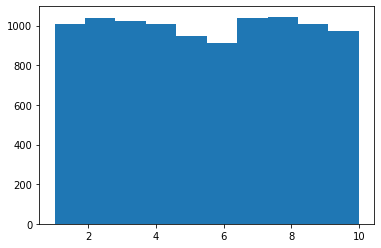

In [7]:
samples = inverse_transform_sampling(min=1, max=10, sample_size=10000)
_, bins, _ = plt.hist(samples)

## Rejection Sampling

In [45]:
from scipy import stats

In [46]:
def uniform_distribution(low, high, size):
    return np.random.uniform(low, high, size)

def rejection_sampling(mu, sigma, sample_size):
    samples = []
    for i in range(sample_size):
        prob_density_func = stats.norm(mu, sigma)
        max_val = prob_density_func.pdf(mu)
        x, y = float('-inf'), float('+inf')     # initialize x, y val
        while y > prob_density_func.pdf(x):     # accept if y > pdf of x
            x = uniform_distribution(mu - 5 * sigma, mu + 5 * sigma, 1)
            y = uniform_distribution(0, max_val, 1)
        samples.append(x[0])
    return samples

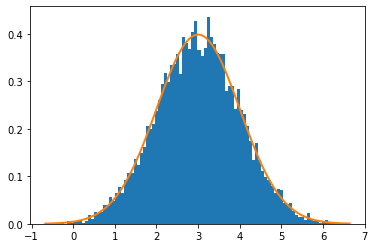

In [44]:
samples = rejection_sampling(3, 1, 10000)
_, bins, _ = plt.hist(samples, 100, density=True)
plt.plot(bins, stats.norm(3, 1).pdf(bins), linewidth=2)
plt.show()

## 2-Dimensional Gaussian Sampling

In [34]:
import numpy as np
import random
from scipy import stats

In [35]:
def min_max_vals(var_index, mu):
    return mu[var_index] - (5 * mu[var_index]), mu[var_index] + (5 * mu[var_index])

def uniform_distribution(min, max):
    return np.random.uniform(min, max)

def probability_density_function(point, loc, scale):
    x, y = point[0], point[1]
    return stats.multivariate_normal.pdf([x, y], loc, scale)    # get pdf after taking in values x, mean, cov

def gaussian_sampling_2d(mu, sigma, sample_size):
    var_index = 0
    samples = []
    while len(samples) < 500:
        x_min, x_max = min_max_vals(var_index, mu)
        y_min, y_max = min_max_vals(~var_index, mu)
        x, y = uniform_distribution(x_min, x_max), uniform_distribution(y_min, y_max)
        pdf = probability_density_function((x, y), mu, sigma)
        if np.random.uniform(0, 1) < pdf:   # accept if yi < pdf of x
            samples.append((x, y))
    return samples

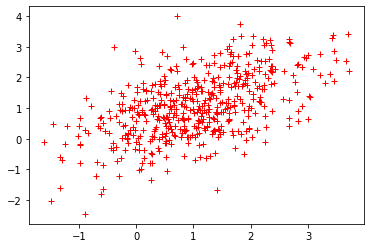

In [39]:
samples = gaussian_sampling_2d([1, 1], [[1, 0.5], [0.5, 1]], 3000)
for sample in samples:
    x, y = sample
    plt.plot(x, y, 'r+')
plt.show()

## Steven's Sampling

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

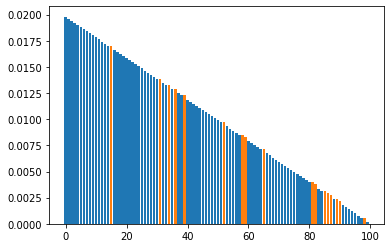

In [14]:
def stevens_sampling(sample_size, population_size):
    values = [i for i in range(1, population_size + 1)][::-1]
    value_distribution = [value / sum(values) for value in values]

    num_values_per_group = int(population_size / sample_size)

    groups, value_indices = [], []
    for i in range(0, len(values), num_values_per_group):
        groups.append(value_distribution[i:i + num_values_per_group])
        value_indices.append(values[i:i + num_values_per_group])

    group_probs = []
    for i, values in enumerate(groups):
        group_probs.append(sum(values))

    group_choices = with_replacement(group_probs, sample_size, population_size)
    chosen_samples = without_replacement(value_indices, group_choices, num_values_per_group)
    return value_distribution, chosen_samples


def with_replacement(group_probs, sample_size, population_size):
    group_choices = []
    for n in range(sample_size):
        random_val = np.random.uniform(0, 1)
        for m in range(population_size):
            if random_val < sum(group_probs[:m+1]):
                choice_val = m
                break
        group_choices.append(choice_val)
    return group_choices

def without_replacement(value_indices, group_choices, num_values_per_group):
    chosen_samples = []
    for i in group_choices:
        samples = np.random.choice(value_indices[i], size=group_choices.count(i), replace=False)
        chosen_samples.extend(samples)
    return chosen_samples

value_distribution, chosen_samples = stevens_sampling(10, 100)
plt.bar(list(range(0, 100)), value_distribution)
plt.bar(chosen_samples, [value_distribution[i-1] for i in chosen_samples])
plt.show()